1. Understand the problem and read in the data
2. Pre-process data, train-test split
3. Build and compile a deep learning model

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [3]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [4]:
'''Import necessary packages'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing

%matplotlib inline

In [5]:
%pwd

'C:\\Users\\Lokesh Balaji\\Desktop\\NEU Study\\INFO6105'

In [6]:
!ls

001562875_LokeshbalajiParameswaran.ipynb
001562875_LokeshbalajiParameswaran_Assignment3_Q1.ipynb
001562875_LokeshbalajiParameswaran_q1.ipynb
001562875_Lokeshbalaji_Parameswaran_Q3.ipynb
Assignement 2
Assignment 1
Assignment 3
INFO6105_online_desc_syllabus.docx
Module_III_code.ipynb
Titanic_full.csv
UniversalBank.csv
aug_train.csv
insurance.csv
knn_model
merged_data.csv
pandas_I.ipynb
pandas_II.ipynb
pima-indians-diabetes.data


In [7]:
path = 'C:\\Users\\Lokesh Balaji\\Desktop\\NEU Study\\INFO6105'

In [8]:
#Reading the data
df = pd.read_csv(f'{path}\\pima-indians-diabetes.data',header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Pre-process data, train-test split,Scaling

In [9]:
#Separate out X and Y

X = df.iloc[:, :8]
Y = df.iloc[:, 8:9]

In [10]:
# Train- Test Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.40, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(460, 8) (308, 8) (460, 1) (308, 1)


In [11]:
print(X.shape,Y.shape)

(768, 8) (768, 1)


In [12]:
#Valid Test Split
(X_Valid, X_Test, Y_Valid, Y_Test) = train_test_split(X_test, Y_test, test_size=0.50, random_state=1)
print(X_Valid.shape,X_Test.shape,Y_Valid.shape,Y_Test.shape)

(154, 8) (154, 8) (154, 1) (154, 1)


In [13]:
#Scaling the data
scaler = preprocessing.StandardScaler().fit(X)
X_sc = pd.DataFrame(scaler.transform(X))
#X_con_sc.columns = ["Age","Fare"]
print(X_sc)
X_sc.head(2)

            0         1         2         3         4         5         6  \
0    0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
1   -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2    1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3   -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4   -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   
..        ...       ...       ...       ...       ...       ...       ...   
763  1.827813 -0.622642  0.356432  1.722735  0.870031  0.115169 -0.908682   
764 -0.547919  0.034598  0.046245  0.405445 -0.692891  0.610154 -0.398282   
765  0.342981  0.003301  0.149641  0.154533  0.279594 -0.735190 -0.685193   
766 -0.844885  0.159787 -0.470732 -1.288212 -0.692891 -0.240205 -0.371101   
767 -0.844885 -0.873019  0.046245  0.656358 -0.692891 -0.202129 -0.473785   

            7  
0    1.425995  
1   -0.190672  
2   -0.105584  
3   -1.0415

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672


# Build and compile a deep learning model

In [14]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(7, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [15]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Fit the DNN with your train data

DNN_model= model.fit(X_train, Y_train, validation_data=(X_Valid, Y_Valid), epochs=150, batch_size=5)

Epoch 1/150
92/92 [==============================] - 1s 5ms/step - loss: 6.6885 - accuracy: 0.3633 - val_loss: 2.3863 - val_accuracy: 0.4675
Epoch 2/150
92/92 [==============================] - 0s 2ms/step - loss: 1.6145 - accuracy: 0.4629 - val_loss: 1.4488 - val_accuracy: 0.5130
Epoch 3/150
92/92 [==============================] - 0s 2ms/step - loss: 1.3332 - accuracy: 0.4295 - val_loss: 1.1860 - val_accuracy: 0.5455
Epoch 4/150
92/92 [==============================] - 0s 1ms/step - loss: 0.9653 - accuracy: 0.4340 - val_loss: 0.8582 - val_accuracy: 0.5974
Epoch 5/150
92/92 [==============================] - 0s 2ms/step - loss: 0.8765 - accuracy: 0.4981 - val_loss: 0.8252 - val_accuracy: 0.5649
Epoch 6/150
92/92 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.5611 - val_loss: 0.7785 - val_accuracy: 0.6234
Epoch 7/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.6154 - val_loss: 0.7460 - val_accuracy: 0.5584
Epoch 8/150
9

Epoch 59/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7516 - val_loss: 0.6552 - val_accuracy: 0.6364
Epoch 60/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7538 - val_loss: 0.7132 - val_accuracy: 0.5974
Epoch 61/150
92/92 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7247 - val_loss: 0.7383 - val_accuracy: 0.5909
Epoch 62/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7118 - val_loss: 0.6828 - val_accuracy: 0.6234
Epoch 63/150
92/92 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7523 - val_loss: 0.6911 - val_accuracy: 0.6234
Epoch 64/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5223 - accuracy: 0.7441 - val_loss: 0.6439 - val_accuracy: 0.6429
Epoch 65/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.7469 - val_loss: 0.6757 - val_accuracy: 0.6234
Epoch 

# Epoch vs Train set

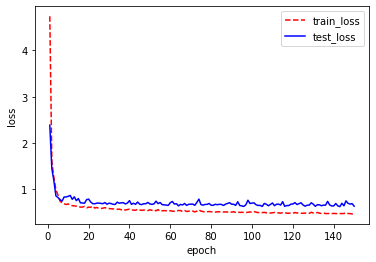

In [18]:
#epoch vs loss
import matplotlib.pyplot as plt

train_loss = DNN_model.history['loss']
test_loss = DNN_model.history['val_loss']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['train_loss','test_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();




# EPOCH vs Accuracy

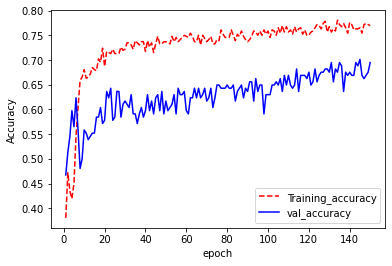

In [20]:
#epoch vs accuracy
import matplotlib.pyplot as plt

train_loss = DNN_model.history['accuracy']
test_loss = DNN_model.history['val_accuracy']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['Training_accuracy','val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show();

In [ ]:
Y_Test.shape

In [21]:
#Scaling the data
scaler = preprocessing.StandardScaler().fit(X_Test)
X_stest = pd.DataFrame(scaler.transform(X_Test))
#X_con_sc.columns = ["Age","Fare"]
print(X_stest)
X_stest.head(2)

            0         1         2         3         4         5         6  \
0   -0.515548 -1.977856 -0.711910  0.339286 -0.355700 -0.897775 -0.446953   
1   -0.850545 -0.304109  0.970724 -0.237001 -0.764082 -0.555700 -0.245408   
2   -0.850545 -0.851295 -0.817074  0.147190  0.143435 -0.779818 -0.737416   
3    0.824441  0.951202  0.550065 -1.453606 -0.764082 -0.272603 -0.903395   
4    0.489444  0.854639  0.655230  0.211222  1.822342  0.022289 -0.091284   
..        ...       ...       ...       ...       ...       ...       ...   
149  0.489444 -1.044420  0.234572 -0.044905 -0.764082 -0.331582  2.196851   
150 -0.515548  0.307453 -1.237733 -0.108937  2.276100  0.305386 -0.909323   
151  1.829433  0.886827  0.970724  0.723477  0.733321 -0.178238  0.854202   
152 -0.850545 -0.722546 -0.501580 -0.301033 -0.237722 -0.933162 -0.660355   
153  1.159438  0.500578  0.760395 -1.453606 -0.764082  0.989536  0.631909   

            7  
0   -0.927691  
1   -0.755357  
2   -0.841524  
3    1.4849

,0,1,2,3,4,5,6,7
0,-0.515548,-1.977856,-0.711910,0.339286,-0.355700,-0.897775,-0.446953,-0.927691
1,-0.850545,-0.304109,0.970724,-0.237001,-0.764082,-0.555700,-0.245408,-0.755357


In [22]:
# Evaluate the model
scores = model.evaluate(X_stest, Y_Test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.8926 - accuracy: 0.6818
Accuracy: 68.18%


# ROC Curve

In [26]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
DNN_pred = model.predict(X_stest).ravel()
rec, fall_out, thresholds = roc_curve(Y_Test,DNN_pred)

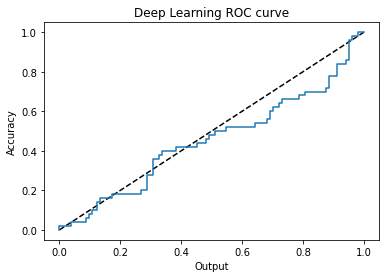

In [27]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
rec, fall_out, thresholds = roc_curve(Y_Test,DNN_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Deep Learning ROC curve')
plt.show()

# AUC score

In [28]:
#AUC Score
roc_auc_score(Y_Test,DNN_pred)

0.4511538461538462

# Increase Dataset Size method 1

In [29]:
df_nor = pd.read_csv(f'{path}\\pima-indians-diabetes.data',header = None)
print(df_nor.shape)
df_nor.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [30]:
#Normal generation method

columns = df_nor.columns.to_numpy()
iteration_count = 2
new_df = pd.DataFrame(columns=columns)

for i in range(iteration_count):
    for k in df.iterrows():
        data_obj = {}
        for j in range(columns.size):
            random_index = np.random.randint(0,15, dtype='int')
            data_obj[columns[j]] = df.loc[random_index][columns[j]]
        new_df = new_df.append(data_obj, ignore_index=True)

df_nor = df_nor.append(new_df, ignore_index=True)
df_nor.shape
df_nor.tail()

,0,1,2,3,4,5,6,7,8
2299,8.0,148.0,50.0,45.0,0.0,37.6,0.587,29.0,1.0
2300,4.0,168.0,92.0,0.0,0.0,26.6,0.351,26.0,0.0
2301,2.0,137.0,72.0,0.0,175.0,31.0,0.134,26.0,0.0
2302,10.0,116.0,50.0,0.0,94.0,25.6,0.248,30.0,1.0
2303,2.0,189.0,72.0,32.0,0.0,31.0,0.537,33.0,1.0


In [33]:
#Separate out X and Y in method 1

X_normal = df_nor.iloc[:, :8]
Y_normal = df_nor.iloc[:, 8:9]


In [34]:
# Scaling the data
scaler = preprocessing.StandardScaler().fit(X_normal)
X_stest_n = pd.DataFrame(scaler.transform(X_normal))
#X_con_sc.columns = ["Age","Fare"]
print(X_stest_n)
X_stest_n.head(2)

             0         1         2         3         4         5         6  \
0     0.392496  0.475222  0.269681  1.077898 -0.539064  0.387613  0.211129   
1    -1.032514 -1.245522 -0.004947  0.708800 -0.539064 -0.424176 -0.343445   
2     0.962500  1.431192 -0.096489 -1.075175 -0.539064 -0.806876  0.301549   
3    -1.032514 -1.136268 -0.004947  0.339702 -0.078589 -0.250221 -0.713160   
4    -1.317516  0.174775 -1.194999  1.077898  0.283912  1.489327  3.548618   
...        ...       ...       ...       ...       ...       ...       ...   
2299  0.962500  0.475222 -0.737286  1.693062 -0.539064  0.851492  0.130756   
2300 -0.177508  1.021491  1.185106 -1.075175 -0.539064 -0.424176 -0.343445   
2301 -0.747512  0.174775  0.269681 -1.075175  0.318203  0.086092 -0.779468   
2302  1.532505 -0.398807 -0.737286 -1.075175 -0.078589 -0.540146 -0.550405   
2303 -0.747512  1.595072  0.269681  0.893349 -0.539064  0.086092  0.030290   

             7  
0     1.007877  
1    -0.500527  
2    -0.4211

,0,1,2,3,4,5,6,7
0,0.392496,0.475222,0.269681,1.077898,-0.539064,0.387613,0.211129,1.007877
1,-1.032514,-1.245522,-0.004947,0.708800,-0.539064,-0.424176,-0.343445,-0.500527


In [35]:
# Train- Test Split
(X_train_n, X_test_n, Y_train_n, Y_test_n) = train_test_split(X_normal, Y_normal, test_size=0.40, random_state=1)
print(X_train_n.shape,X_test_n.shape,Y_train_n.shape,Y_test_n.shape)

(1382, 8) (922, 8) (1382, 1) (922, 1)


In [36]:
(X_Valid_n, X_Test_n, Y_Valid_n, Y_Test_n) = train_test_split(X_test_n, Y_test_n, test_size=0.50, random_state=1)
print(X_Valid_n.shape,X_Test_n.shape,Y_Valid_n.shape,Y_Test_n.shape)

(461, 8) (461, 8) (461, 1) (461, 1)


In [37]:
# Build the deep neural network
model_nor = Sequential()
model_nor.add(Dense(10, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
model_nor.add(Dense(7, kernel_initializer='glorot_uniform', activation='relu'))
model_nor.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [38]:
# Compile the DNN

model_nor.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Fit the DNN with your train data

DNN_model_nor= model_nor.fit(X_train_n, Y_train_n, validation_data=(X_Valid_n, Y_Valid_n), epochs=150, batch_size=5)

Epoch 1/150
277/277 [==============================] - 1s 2ms/step - loss: 3.8437 - accuracy: 0.4825 - val_loss: 1.5663 - val_accuracy: 0.4751
Epoch 2/150
277/277 [==============================] - 0s 1ms/step - loss: 1.2728 - accuracy: 0.5140 - val_loss: 0.9462 - val_accuracy: 0.5466
Epoch 3/150
277/277 [==============================] - 0s 1ms/step - loss: 0.9540 - accuracy: 0.4891 - val_loss: 0.8286 - val_accuracy: 0.5401
Epoch 4/150
277/277 [==============================] - 0s 1ms/step - loss: 0.8747 - accuracy: 0.5431 - val_loss: 0.7674 - val_accuracy: 0.5315
Epoch 5/150
277/277 [==============================] - 0s 1ms/step - loss: 0.7465 - accuracy: 0.5634 - val_loss: 0.7461 - val_accuracy: 0.5358
Epoch 6/150
277/277 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.5783 - val_loss: 0.7204 - val_accuracy: 0.5380
Epoch 7/150
277/277 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.5772 - val_loss: 0.7042 - val_accuracy: 0.5445

Epoch 58/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6143 - val_loss: 0.7547 - val_accuracy: 0.5510
Epoch 59/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5924 - val_loss: 0.6993 - val_accuracy: 0.5336
Epoch 60/150
277/277 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.5789 - val_loss: 0.6894 - val_accuracy: 0.5922
Epoch 61/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6220 - val_loss: 0.6739 - val_accuracy: 0.6030
Epoch 62/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6156 - val_loss: 0.6743 - val_accuracy: 0.5683
Epoch 63/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5643 - val_loss: 0.6741 - val_accuracy: 0.5922
Epoch 64/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6060 - val_loss: 0.7200 - val_accuracy:

Epoch 115/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.5933 - val_loss: 0.6819 - val_accuracy: 0.5987
Epoch 116/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.6174 - val_loss: 0.6865 - val_accuracy: 0.5922
Epoch 117/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.5712 - val_loss: 0.6852 - val_accuracy: 0.5965
Epoch 118/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5974 - val_loss: 0.6767 - val_accuracy: 0.5922
Epoch 119/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6079 - val_loss: 0.6801 - val_accuracy: 0.5748
Epoch 120/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6236 - val_loss: 0.6861 - val_accuracy: 0.6009
Epoch 121/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.6025 - val_loss: 0.6831 - val_ac

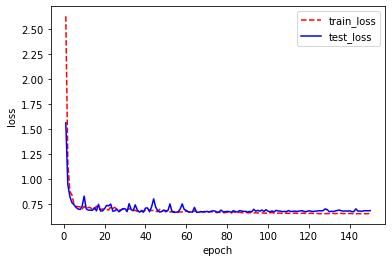

In [41]:

#EPOCH VS LOSS
import matplotlib.pyplot as plt

train_loss = DNN_model_nor.history['loss']
test_loss = DNN_model_nor.history['val_loss']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['train_loss','test_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

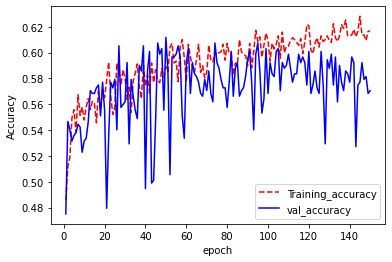

In [43]:
#EPOCH VS ACCURACY

import matplotlib.pyplot as plt

train_loss = DNN_model_nor.history['accuracy']
test_loss = DNN_model_nor.history['val_accuracy']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['Training_accuracy','val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show();

In [44]:
# Evaluate the model
scores = model_nor.evaluate(X_Test_n, Y_Test_n)
print ("Accuracy: %.2f%%" %(scores[1]*100))

15/15 [==============================] - 0s 989us/step - loss: 0.6671 - accuracy: 0.5770
Accuracy: 57.70%


# ROC_CURVE

In [45]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
DNN_pred_nor = model_nor.predict(X_Test_n).ravel()
rec, fall_out, thresholds = roc_curve(Y_Test_n,DNN_pred_nor)

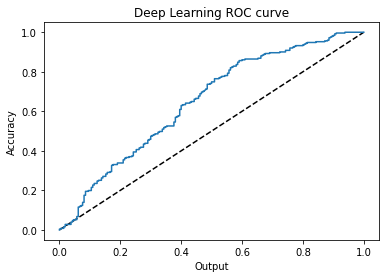

In [46]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
rec, fall_out, thresholds = roc_curve(Y_Test_n,DNN_pred_nor)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Deep Learning ROC curve')
plt.show()

In [47]:
#AUC Score
roc_auc_score(Y_Test_n,DNN_pred_nor)

0.6484443179662304

# Increase dataset size method 2

In [48]:
df_uni = pd.read_csv(f'{path}\\pima-indians-diabetes.data',header = None)
print(df_uni.shape)
df_uni.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [49]:
#Uniform Generation
columns = df_uni.columns.to_numpy()
iteration_count = 2
new_df = pd.DataFrame(columns=columns)

for i in range(iteration_count):
    for k in df.iterrows():
        data_obj = {}
        for j in range(columns.size):
            random_index_1 = np.random.randint(0,15)
            data_obj[columns[j]] = df.loc[random_index_1][columns[j]]
            
        new_df = new_df.append(data_obj, ignore_index=True)

df_uni = df_uni.append(new_df, ignore_index=True)
df_uni.shape
df_uni.tail()

,0,1,2,3,4,5,6,7,8
2299,8.0,89.0,40.0,0.0,0.0,28.1,0.351,54.0,0.0
2300,8.0,148.0,96.0,0.0,94.0,26.6,1.441,33.0,0.0
2301,6.0,197.0,74.0,0.0,543.0,26.6,0.201,33.0,1.0
2302,1.0,139.0,66.0,35.0,0.0,25.8,0.351,33.0,1.0
2303,6.0,139.0,70.0,45.0,0.0,28.1,0.351,31.0,0.0


In [50]:
#Separate out X and Y in method 1

X_uniform = df_uni.iloc[:, :8]
Y_uniform = df_uni.iloc[:, 8:9]

In [51]:
# Scaling the data
scaler = preprocessing.StandardScaler().fit(X_uniform)
X_stest_u = pd.DataFrame(scaler.transform(X_uniform))
#X_con_sc.columns = ["Age","Fare"]
print(X_stest_u)
X_stest_u.head(2)

             0         1         2         3         4         5         6  \
0     0.389905  0.437174  0.242876  1.086957 -0.536778  0.399546  0.198921   
1    -1.047441 -1.285133 -0.051566  0.716144 -0.536778 -0.392591 -0.339826   
2     0.964844  1.394012 -0.149713 -1.076120 -0.536778 -0.766027  0.286760   
3    -1.047441 -1.175780 -0.051566  0.345331 -0.078865 -0.222847 -0.698991   
4    -1.334910  0.136454 -1.327481  1.086957  0.281621  1.474589  3.441163   
...        ...       ...       ...       ...       ...       ...       ...   
2299  0.964844 -1.175780 -1.327481 -1.076120 -0.536778 -0.222847 -0.339826   
2300  0.964844  0.437174  1.420645 -1.076120 -0.078865 -0.392591  1.787834   
2301  0.389905  1.776747  0.341024 -1.076120  2.108403 -0.392591 -0.632623   
2302 -1.047441  0.191130 -0.051566  1.086957 -0.536778 -0.483121 -0.339826   
2303  0.389905  0.191130  0.144729  1.704979 -0.536778 -0.222847 -0.339826   

             7  
0     0.994688  
1    -0.509508  
2    -0.4303

,0,1,2,3,4,5,6,7
0,0.389905,0.437174,0.242876,1.086957,-0.536778,0.399546,0.198921,0.994688
1,-1.047441,-1.285133,-0.051566,0.716144,-0.536778,-0.392591,-0.339826,-0.509508


In [52]:
# Train- Test Split
(X_train_u, X_test_u, Y_train_u, Y_test_u) = train_test_split(X_stest_u, Y_uniform, test_size=0.40, random_state=1)
print(X_train_u.shape,X_test_u.shape,Y_train_u.shape,Y_test_u.shape)

(1382, 8) (922, 8) (1382, 1) (922, 1)


In [53]:
(X_Valid_u, X_Test_u, Y_Valid_u, Y_Test_u) = train_test_split(X_test_u, Y_test_u, test_size=0.50, random_state=1)
print(X_Valid_u.shape,X_Test_u.shape,Y_Valid_u.shape,Y_Test_u.shape)

(461, 8) (461, 8) (461, 1) (461, 1)


In [54]:
# Build the deep neural network
model_uni = Sequential()
model_uni.add(Dense(10, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
model_uni.add(Dense(7, kernel_initializer='glorot_uniform', activation='relu'))
model_uni.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [55]:
# Compile the DNN

model_uni.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# Fit the DNN with your train data

DNN_model_uni= model_uni.fit(X_train_u, Y_train_u, validation_data=(X_Valid_u, Y_Valid_u), epochs=150, batch_size=5)

Epoch 1/150
277/277 [==============================] - 1s 2ms/step - loss: 0.7052 - accuracy: 0.5041 - val_loss: 0.6864 - val_accuracy: 0.5748
Epoch 2/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5607 - val_loss: 0.6786 - val_accuracy: 0.6009
Epoch 3/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5934 - val_loss: 0.6751 - val_accuracy: 0.6052
Epoch 4/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.6228 - val_loss: 0.6732 - val_accuracy: 0.6030
Epoch 5/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.6413 - val_loss: 0.6695 - val_accuracy: 0.5944
Epoch 6/150
277/277 [==============================] - ETA: 0s - loss: 0.6568 - accuracy: 0.64 - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6456 - val_loss: 0.6665 - val_accuracy: 0.5900
Epoch 7/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.6230

Epoch 114/150
277/277 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.7173 - val_loss: 0.6964 - val_accuracy: 0.5987
Epoch 115/150
277/277 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.6961 - val_loss: 0.6908 - val_accuracy: 0.5965
Epoch 116/150
277/277 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.6998 - val_loss: 0.6895 - val_accuracy: 0.5965
Epoch 117/150
277/277 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.6964 - val_loss: 0.6904 - val_accuracy: 0.5965
Epoch 118/150
277/277 [==============================] - 0s 1ms/step - loss: 0.5615 - accuracy: 0.7258 - val_loss: 0.6927 - val_accuracy: 0.5879
Epoch 119/150
277/277 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.6839 - val_loss: 0.6950 - val_accuracy: 0.5857
Epoch 120/150
277/277 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.7075 - val_loss: 0.6935 - val_ac

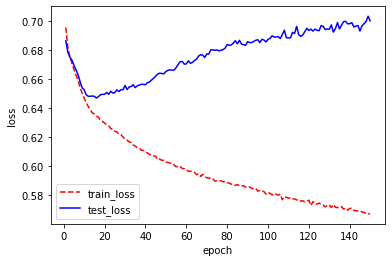

In [58]:
#EPOCH VS LOSS

import matplotlib.pyplot as plt

train_loss = DNN_model_uni.history['loss']
test_loss = DNN_model_uni.history['val_loss']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['train_loss','test_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

<function matplotlib.pyplot.show(close=None, block=None)>

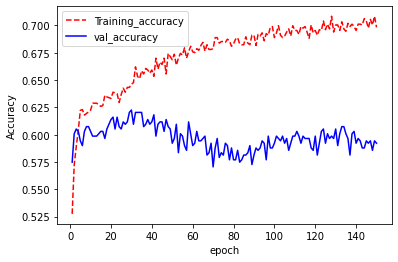

In [60]:
#EPOCH VS ACCURACY
import matplotlib.pyplot as plt

train_loss = DNN_model_uni.history['accuracy']
test_loss = DNN_model_uni.history['val_accuracy']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['Training_accuracy','val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show

In [61]:
# Evaluate the model
scores = model_uni.evaluate(X_Test_u, Y_Test_u)
print ("Accuracy: %.2f%%" %(scores[1]*100))

15/15 [==============================] - 0s 926us/step - loss: 0.7750 - accuracy: 0.5466
Accuracy: 54.66%


# ROC_CURVE

In [62]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
DNN_pred_uni = model_uni.predict(X_Test_u).ravel()
rec, fall_out, thresholds = roc_curve(Y_Test_u,DNN_pred_uni)

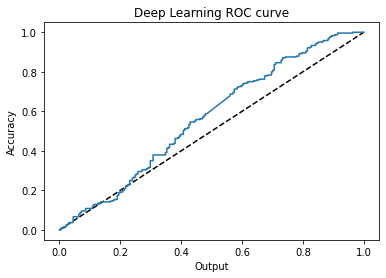

In [63]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
rec, fall_out, thresholds = roc_curve(Y_Test_u,DNN_pred_uni)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Deep Learning ROC curve')
plt.show()

In [64]:
#AUC Score
roc_auc_score(Y_Test_u,DNN_pred_uni)

0.5655542986425339